<a href="https://colab.research.google.com/github/female-coders-linz/workshops/blob/master/object_detection/Object_detection_Star_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object detection using YOLOv8

In this notebook we want to automatically detect objects of a certain domain in images. For this we use a pre-trained model called "YOLO-8". This notebook is based on this [GitHub notebook](https://github.com/roboflow/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb)


## Preparations

### Enable GPU Acceleration
If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `T4 GPU`, and then click Save. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

Let's ensure that we have access to GPU. We can use` nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `T4 GPU`, and then click `Save`.



In [1]:
!nvidia-smi

Sun Oct  8 15:05:57 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Set HOME

set HOME as environment variable. We will need it later one to make sure we execute scripts / download files in the correct directory

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content



### Install YOLOv8

We use `pip` to install YOLOv8.

In [3]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.195 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.7/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## First predictions with YOLOv8

Let's use YOLOv8 to make first predictions to see how smart it already is. 🙂

For this we can use the CLI (=Command Line Interface): `yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

  1. run `predict` (provided via `mode`) on an image (provided via `source`).

In [5]:
%cd {HOME}
!yolo task=classify mode=predict model=yolov8n-cls.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/content
Ultralytics YOLOv8.0.195 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 2715880 parameters, 0 gradients, 4.3 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 224x224 basset 0.46, beagle 0.27, Walker_hound 0.20, English_foxhound 0.02, bloodhound 0.01, 4.0ms
Speed: 1.6ms preprocess, 4.0ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


  2. show the results of the detected objects

/content


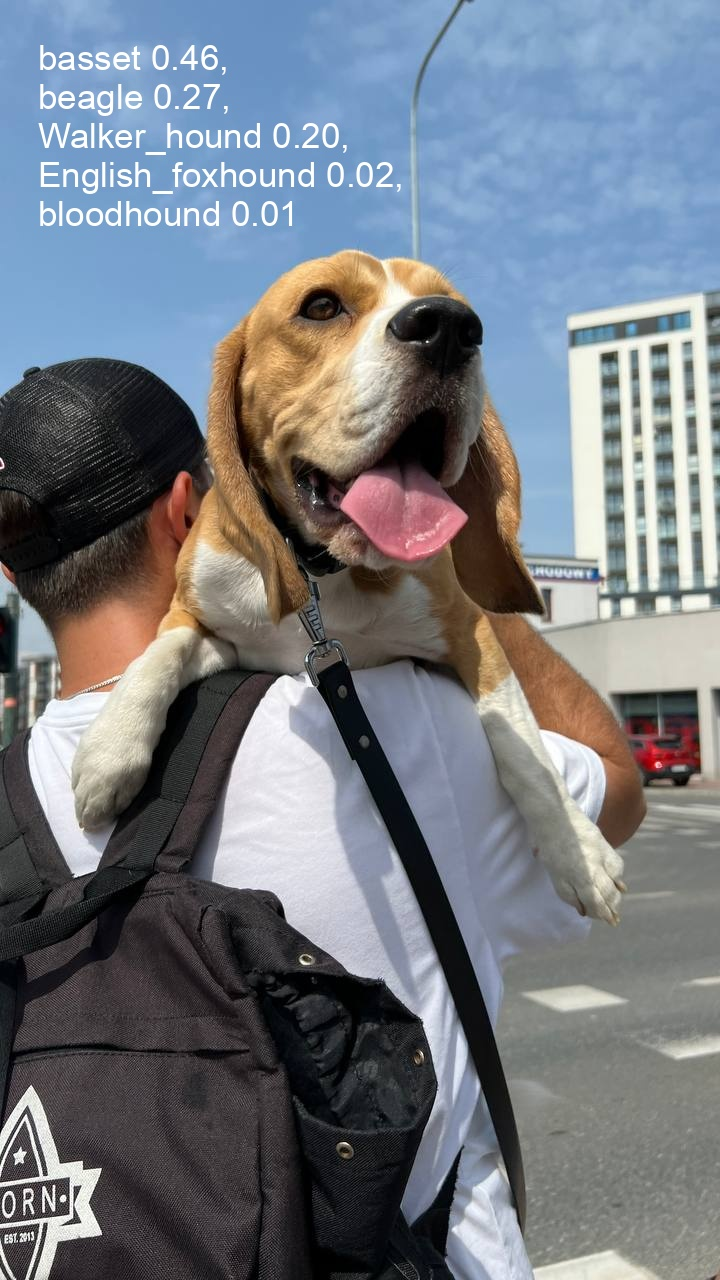

In [6]:
%cd {HOME}
Image(filename='runs/classify/predict/dog.jpeg', height=600)

Wow! YOLOv8 has detected not even that it is a dog, but that it is a basset (46%) or a beagle (27%).

Let's see what it can do with a more complex use case when we want to detect star signs.

**Keep an eye on the folder name** - as we now do the second prediction, the folder name changes to `predict2`.

In case you want to delete old prediction runs, just run the following command
```
!rm -r /content/runs/classify/<folder_name>
```
e.g.
```
!rm -r /content/runs/classify/predict2
```

In [7]:
%cd {HOME}

image_link='https://www.star-registration.com/cdn/shop/articles/02_03_Gemini_1200x1200.png'

!yolo task=classify mode=predict model=yolov8n-cls.pt conf=0.25 source={image_link}


/content
Ultralytics YOLOv8.0.195 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 2715880 parameters, 0 gradients, 4.3 GFLOPs

Found https://www.star-registration.com/cdn/shop/articles/02_03_Gemini_1200x1200.png locally at 02_03_Gemini_1200x1200.png
image 1/1 /content/02_03_Gemini_1200x1200.png: 224x224 scuba_diver 0.32, jellyfish 0.16, sea_snake 0.04, great_white_shark 0.04, lionfish 0.03, 13.2ms
Speed: 5.6ms preprocess, 13.2ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


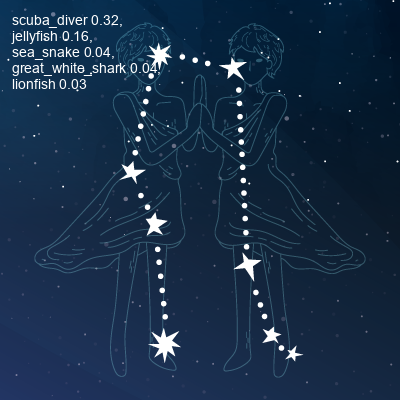

In [8]:
%cd {HOME}
Image(filename='runs/classify/predict2/02_03_Gemini_1200x1200.png', height=600)

Well, the result is not very convincing. It thinkgs it is a scuba diver - and is 32%! sure. Let's see if we can improve this.

## Use a custom dataset

To improve the model results, one has to provide a custom dataset and then
re-train the model. In our case, we  would provide star images as we want to detect star images / constillations.

You can create your own dataset, or use already a prepared dataset. The "Roboflow Universe" provides more than 110K open-sourced datasets. There is also the option to create a custom dataset.

We first use a pre-defined dataset from "Roboflow Universe" of [Star image Constalations](https://universe.roboflow.com/yuri-lima-lcztr/constalations-classification).

  1. follow the link
  2. Click on `Download this dataset`
  3. Select `YOLOv8` as format and click `Continue`
  4. Copy the code (small blue button) and click `Done`
  5. Insert the code here (should look similar)





In [9]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="n1nZ8MhOdFOpHABFRUA2")
project = rf.workspace("yuri-lima-lcztr").project("constalations-classification")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.195, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Constalations-Classification-1 in yolov8:: 100%|██████████| 1296/1296 [00:00<00:00, 5768.81it/s]


Now we have the custom data downloaded in our environment.


Before we run the training, we have to adapt some paths in the data.yaml (for this dataset).
In the menu, navigate to the folder `content/Constalations-Classification-1`, open `data.yaml` and ensure that all paths for `train`, `test` and `val` start with `/content/Constalations-Classification-1/`. Save the file.

Now, let's start the training using the CLI.

In [11]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25

/content
Ultralytics YOLOv8.0.195 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Constalations-Classification-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format

### Inspect Results

Also here, ensure you are using the correct folder. If you have multiple trainings, the name of the folder changes, e.g. to `train2`.

In [14]:
!ls {HOME}/runs/detect/train4/

args.yaml					    train_batch1.jpg
confusion_matrix_normalized.png			    train_batch2.jpg
confusion_matrix.png				    train_batch435.jpg
events.out.tfevents.1696777665.e8002a6fe65f.9722.0  train_batch436.jpg
F1_curve.png					    train_batch437.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights
train_batch0.jpg


/content


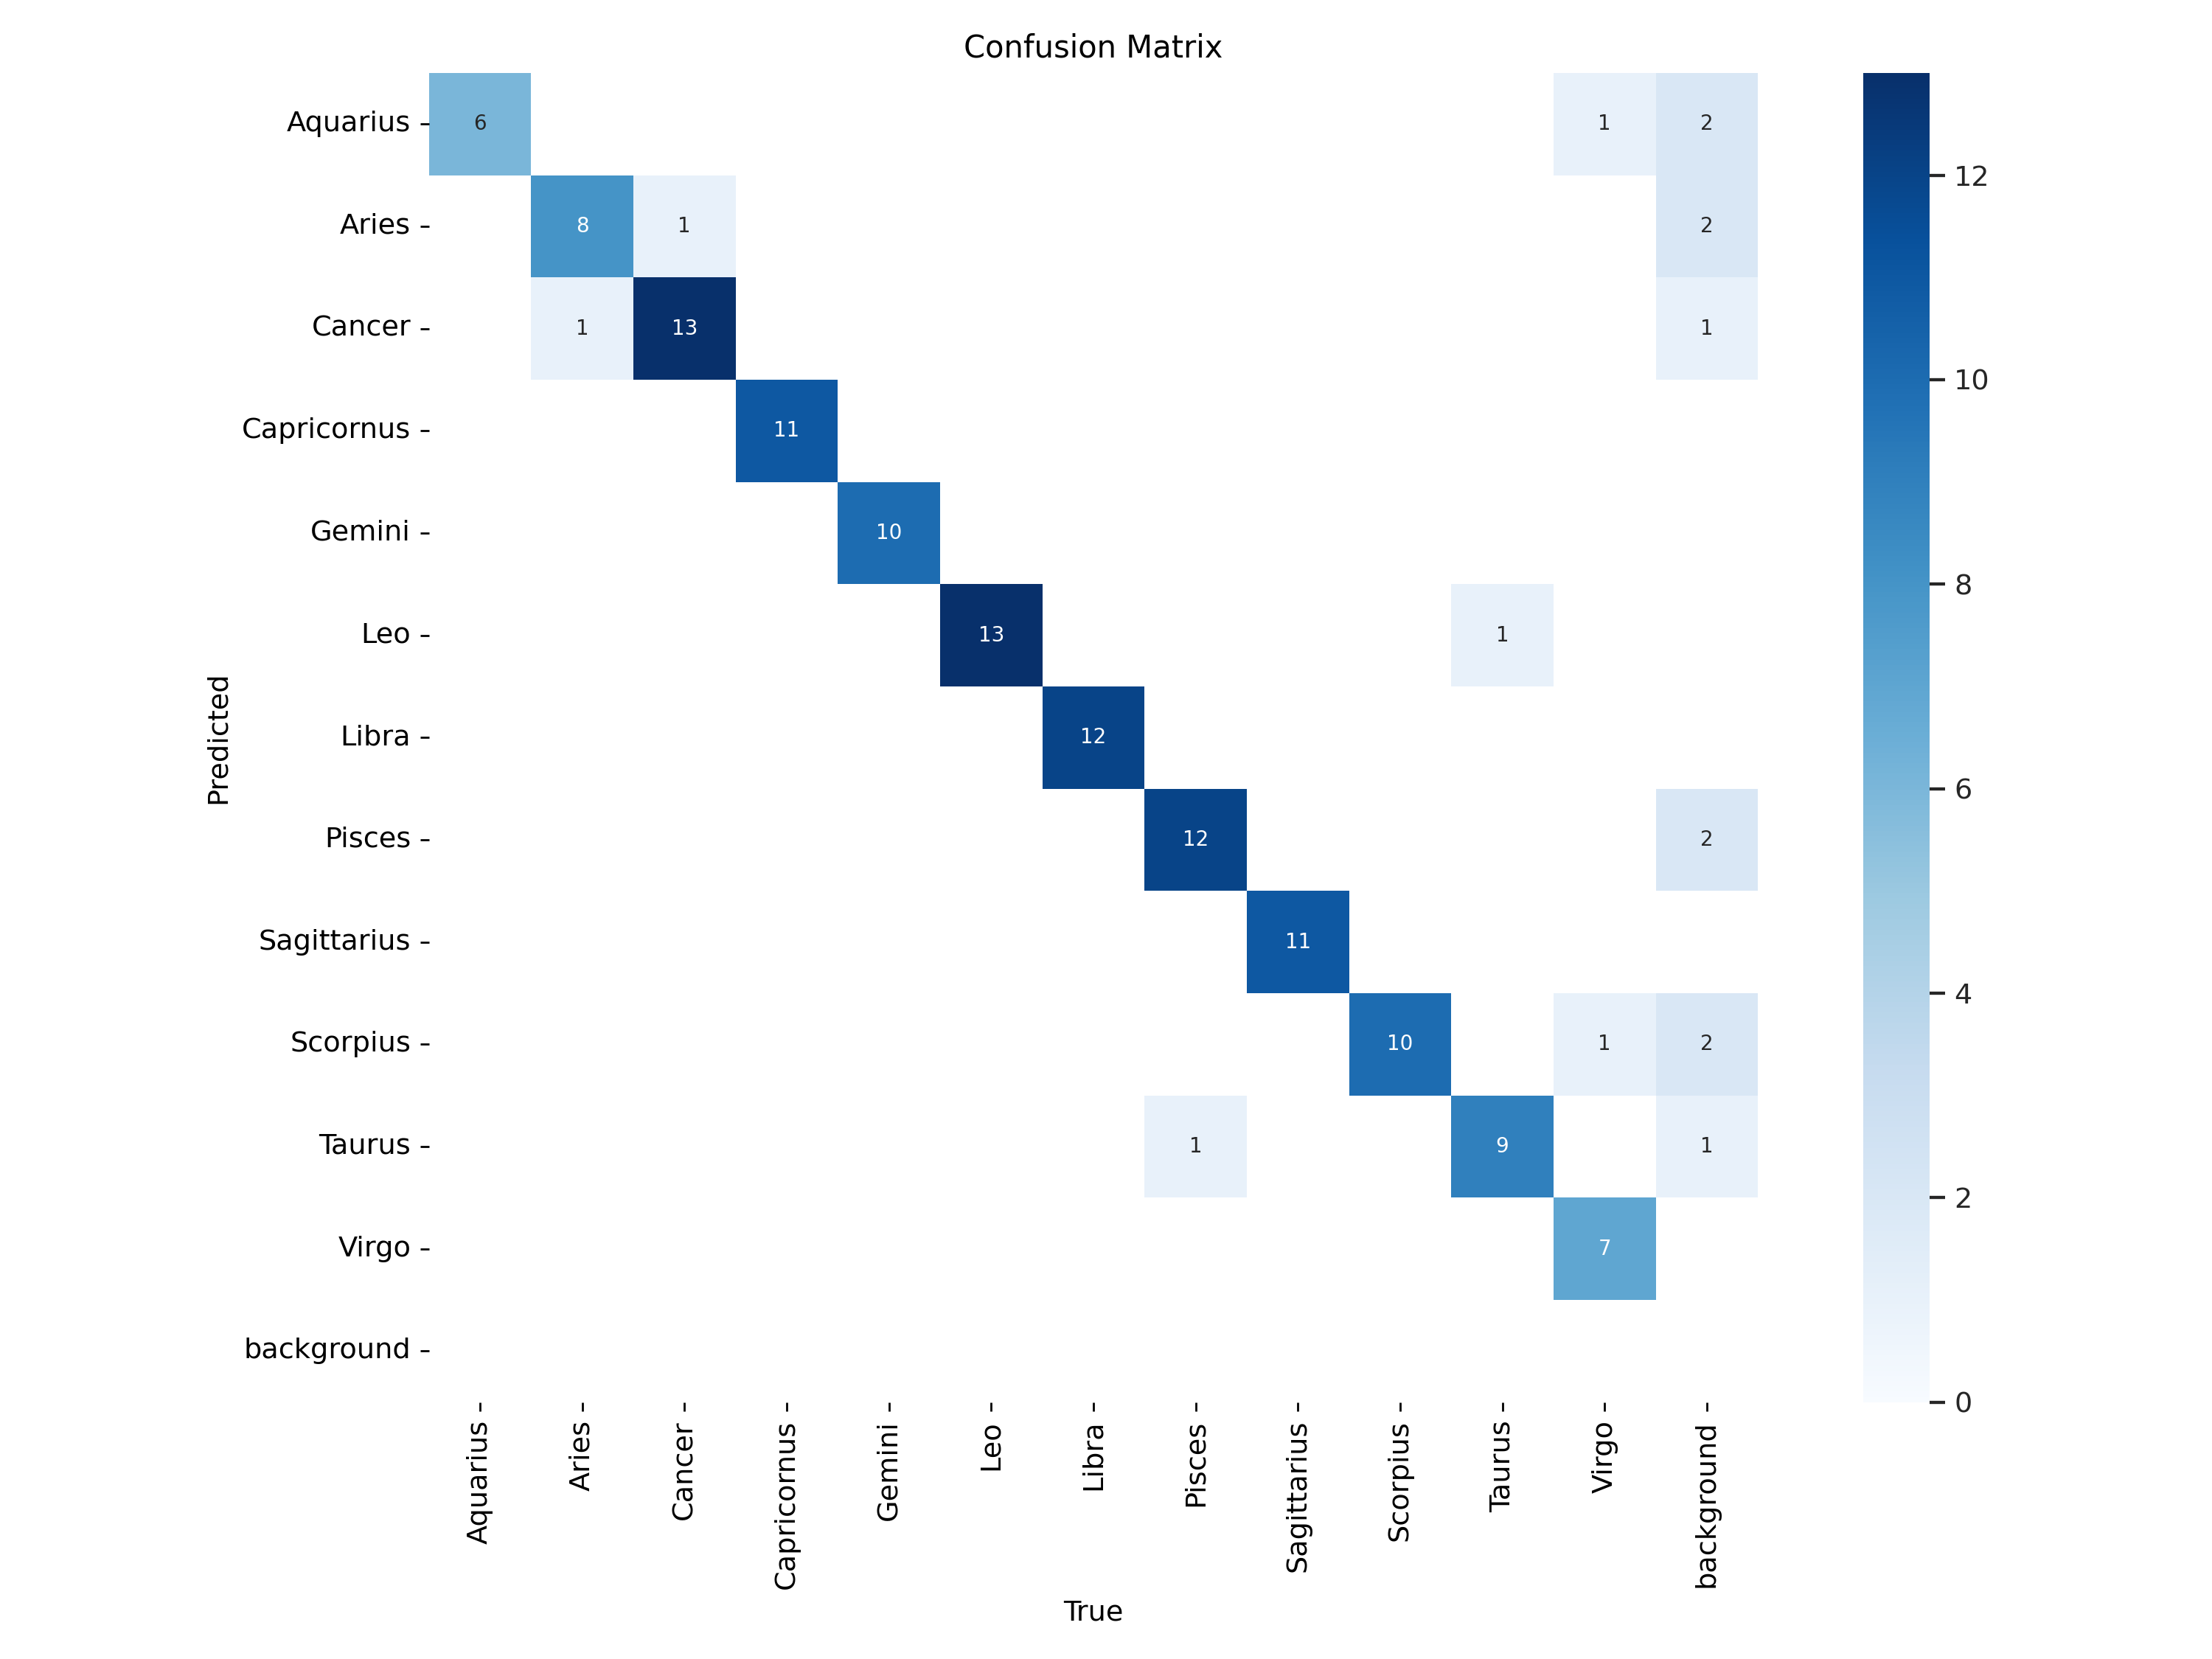

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600)

/content


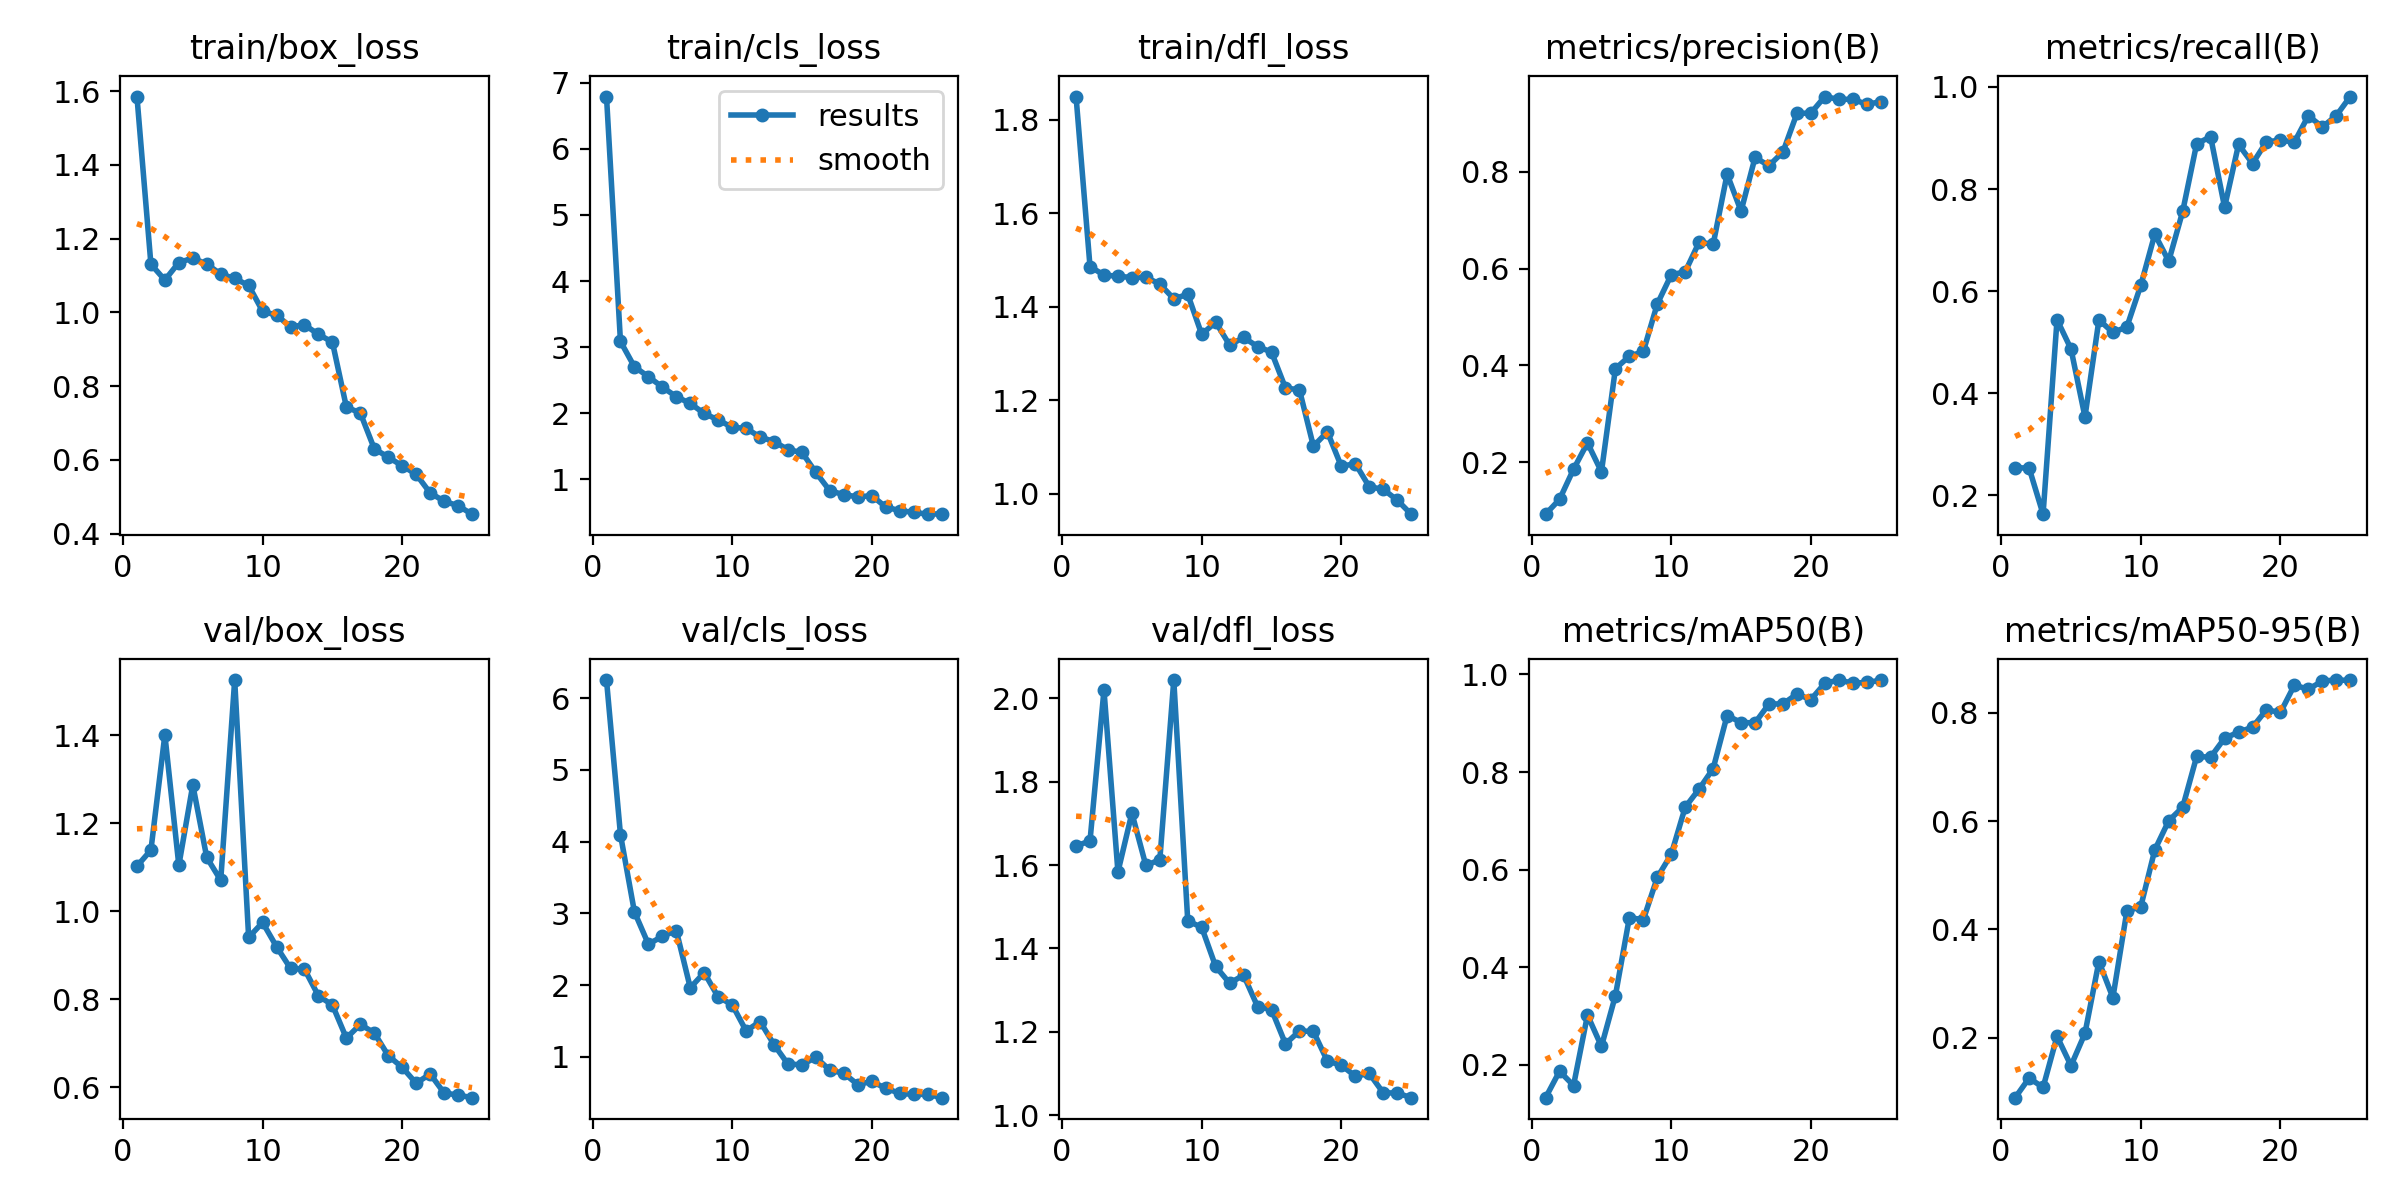

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

### Validate Custom Model

/content


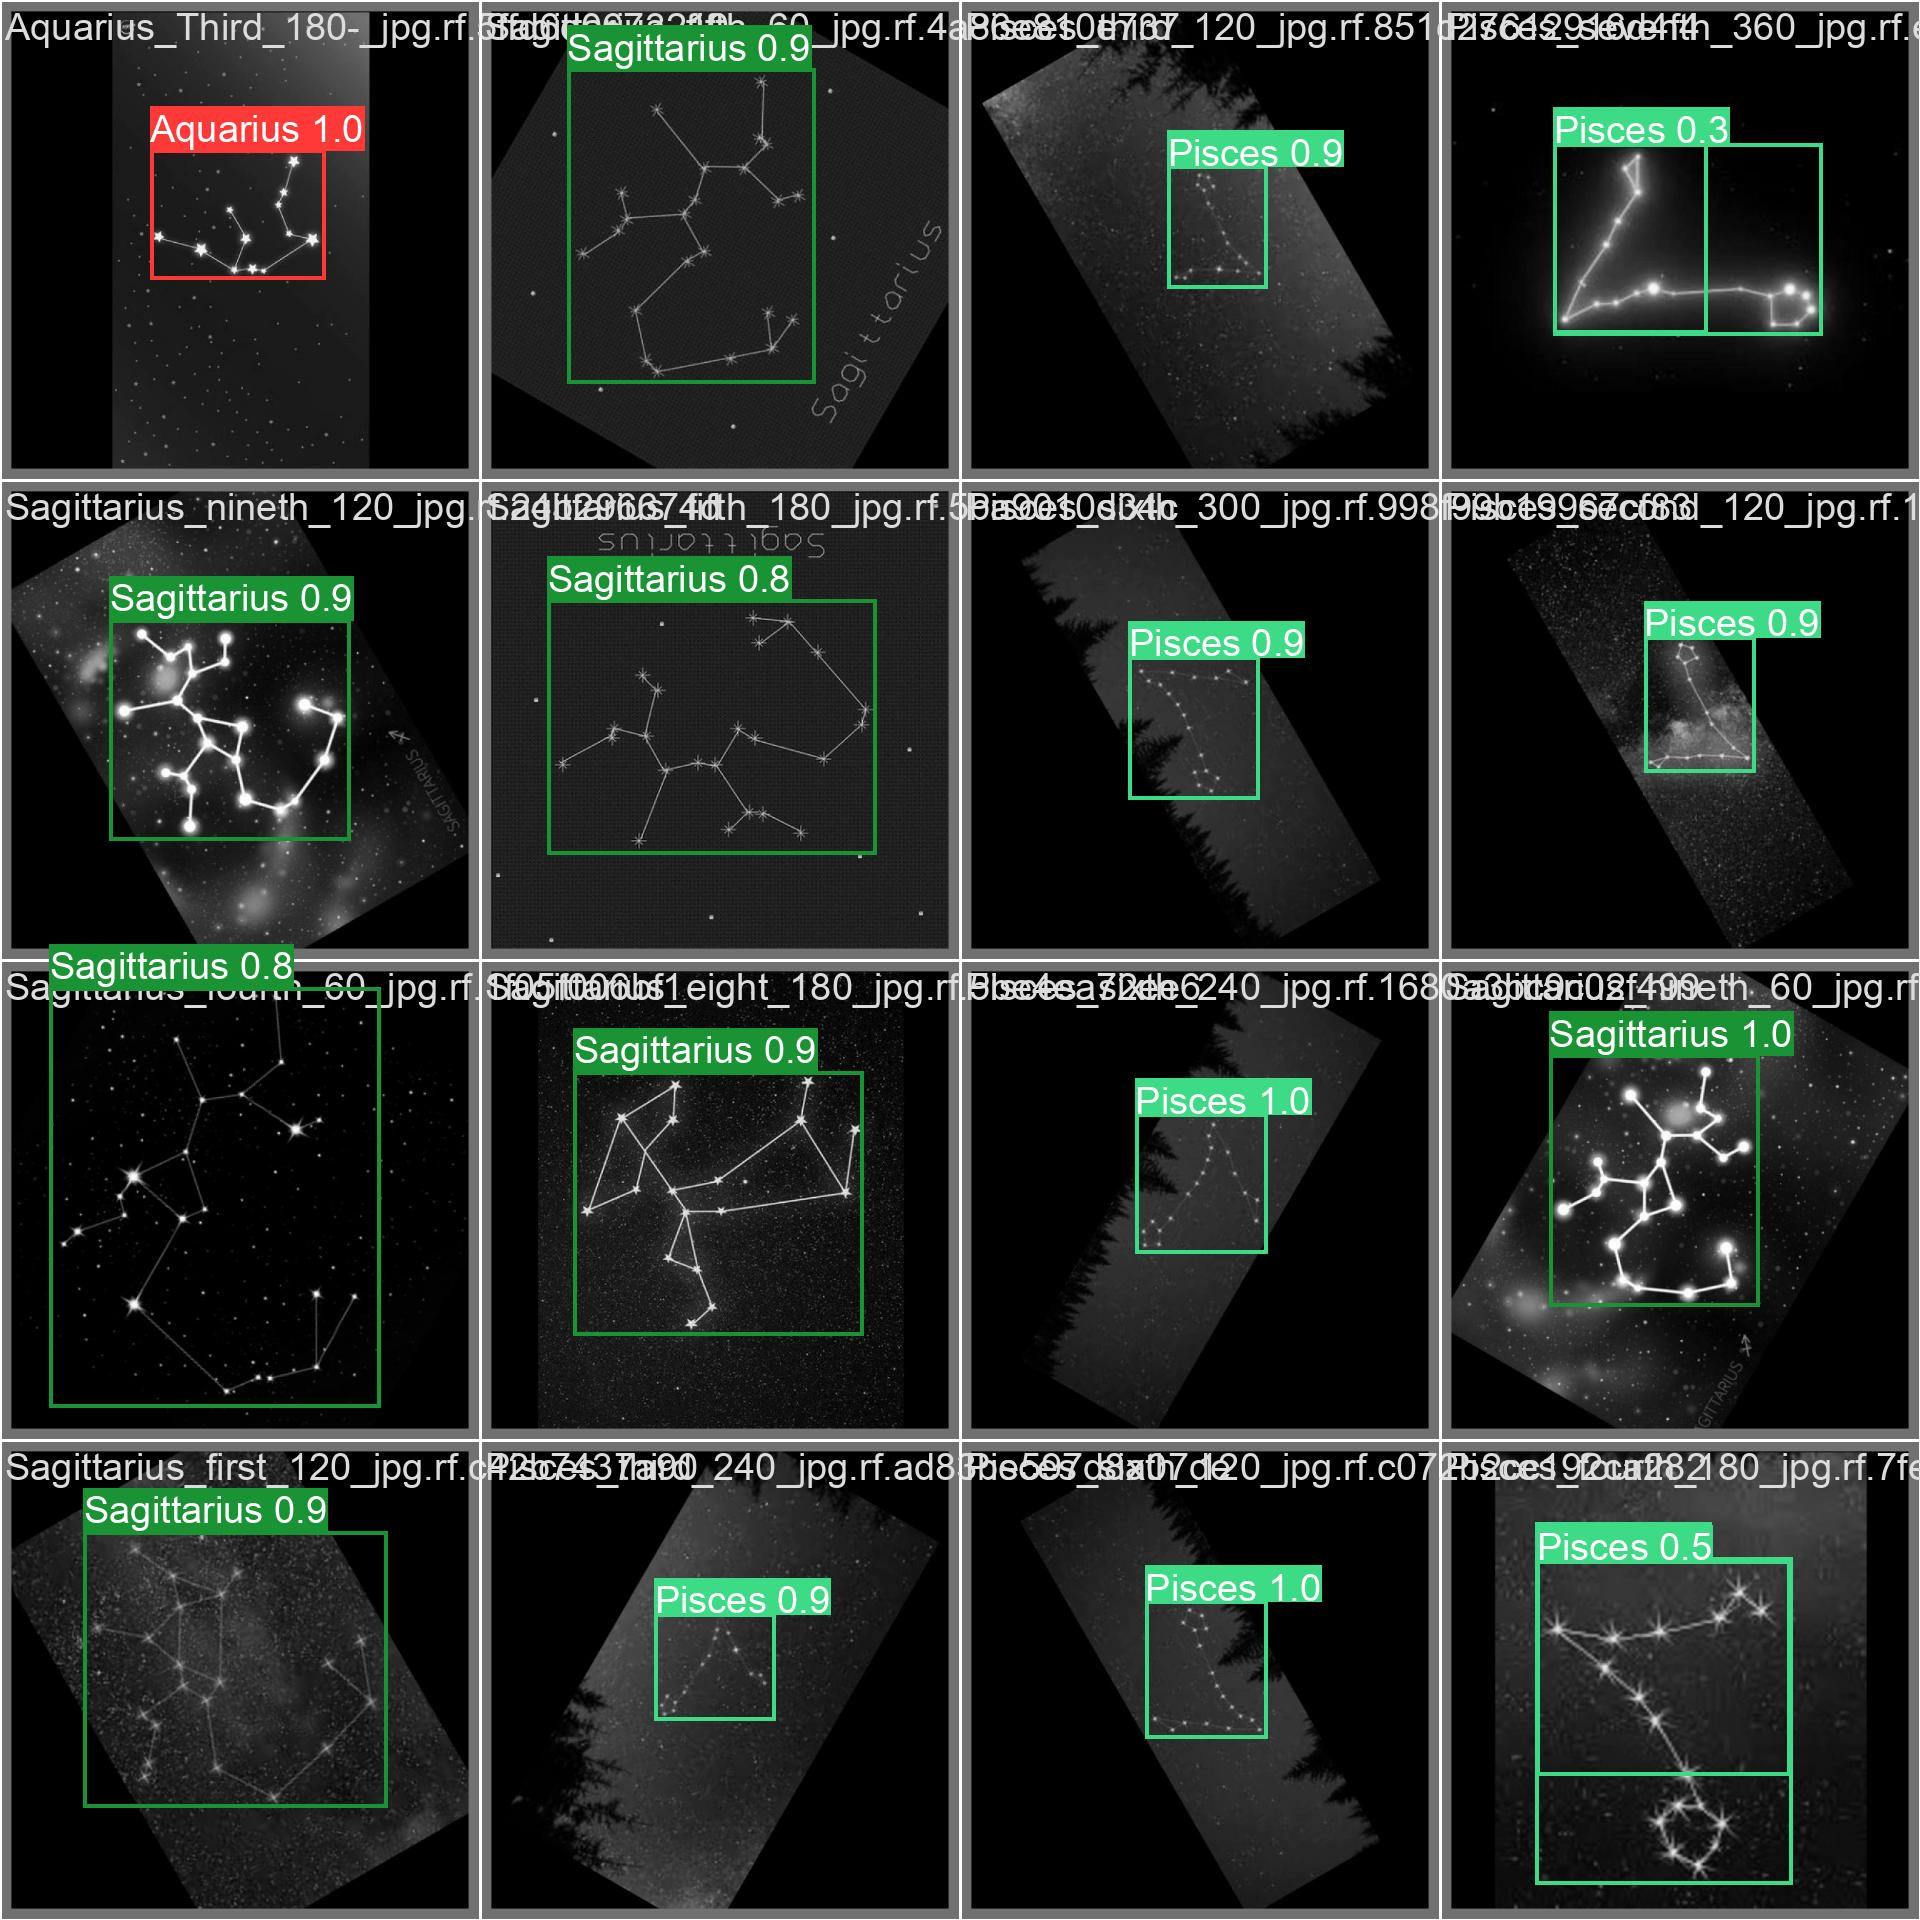

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/val_batch0_pred.jpg', width=600)

### [Optional] Inference with current model

Taking the best out of both worlds

In [19]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True



/content
Ultralytics YOLOv8.0.195 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11130228 parameters, 0 gradients, 28.5 GFLOPs

image 1/65 /content/Constalations-Classification-1/test/images/Aquarius_Second_120-_jpg.rf.a41446044ff5b71ce44b7d9905e0ae33.jpg: 640x640 1 Aquarius, 16.3ms
image 2/65 /content/Constalations-Classification-1/test/images/Aquarius_eight_120-_jpg.rf.907a0067cd1eb10f548157c3f6d632cc.jpg: 640x640 1 Aquarius, 16.4ms
image 3/65 /content/Constalations-Classification-1/test/images/Aquarius_sixth_240-_jpg.rf.a904d240fc33db3dc47cb1cc7f22ee57.jpg: 640x640 1 Aquarius, 16.3ms
image 4/65 /content/Constalations-Classification-1/test/images/Aries_fifth_120_jpg.rf.fe2681ac3003f9e6458c2fa422de2f32.jpg: 640x640 1 Aries, 16.3ms
image 5/65 /content/Constalations-Classification-1/test/images/Aries_first_60_jpg.rf.7d0bd1d042a84e79747d5735d2bff01e.jpg: 640x640 1 Aries, 16.3ms
image 6/65 /content/Constalations-Classification-1/test/imag

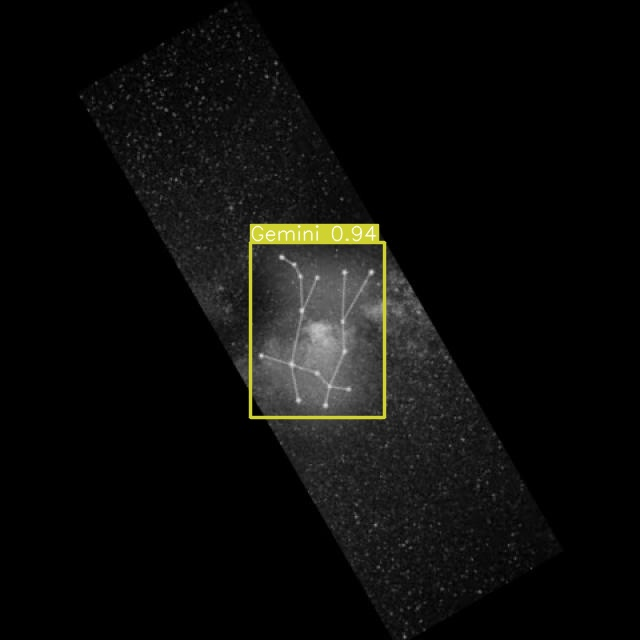

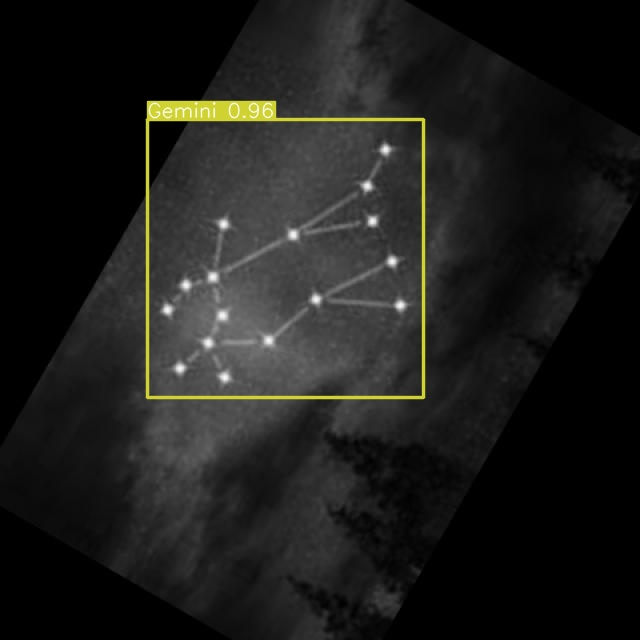

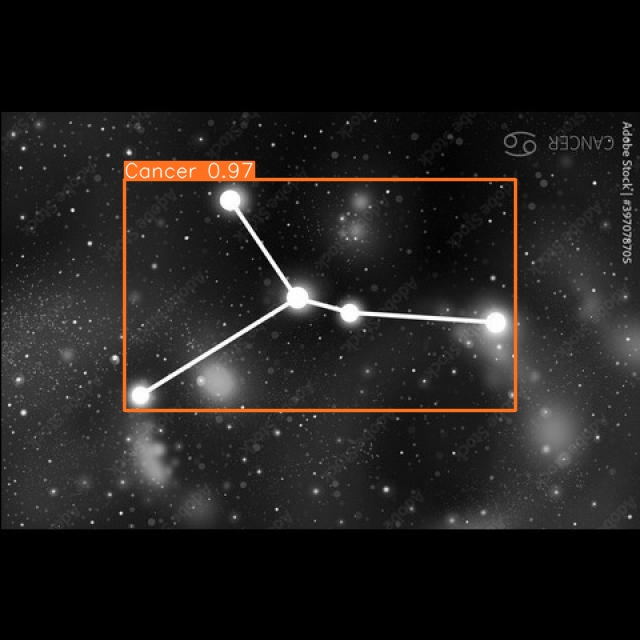

In [20]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [24]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source={image_link} save=True


/content
Ultralytics YOLOv8.0.195 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11130228 parameters, 0 gradients, 28.5 GFLOPs

Found https://www.star-registration.com/cdn/shop/articles/02_03_Gemini_1200x1200.png locally at 02_03_Gemini_1200x1200.png
image 1/1 /content/02_03_Gemini_1200x1200.png: 640x640 1 Gemini, 16.3ms
Speed: 4.5ms preprocess, 16.3ms inference, 104.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


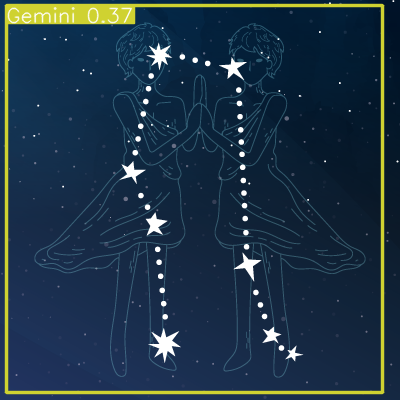

In [26]:
%cd {HOME}
Image(filename='runs/detect/predict3/02_03_Gemini_1200x1200.png', height=600)